## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recreate hand written digits. Then, we will use the autoencoder to generate new digits to see how well it performs. Finally, we will use the autoencoder to generate a new symbol that is not in the training se (and see that it does a poor job at doing this).

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import tensorflow as tf
from tensorflow.keras.preprocessing import image


### Load and normalize our data

In [3]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


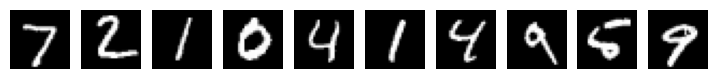

In [4]:
n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [5]:
input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [6]:
# Train the autoencoder with MNIST data

# NOTE: This is our first example of using callbacks. Callbacks are functions that can be applied during training. In this case,
# we are using EarlyStopping, which will stop training if there is no improvement in the loss after a certain number of epochs.

early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1) # if there is no improvement in 3 epochs, stop training

history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(test_images, test_images),
    callbacks=[early_stop] # this is the callback; notice it's in a list. You can have multiple callbacks.
)

Epoch 1/10
469/469 [==============================] - 25s 46ms/step - loss: 0.2181 - val_loss: 0.1752
Epoch 2/10
469/469 [==============================] - 18s 37ms/step - loss: 0.1620 - val_loss: 0.1520
Epoch 3/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1476 - val_loss: 0.1445
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1420 - val_loss: 0.1404
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1386 - val_loss: 0.1382
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1360 - val_loss: 0.1359
Epoch 7/10
469/469 [==============================] - 18s 37ms/step - loss: 0.1339 - val_loss: 0.1341
Epoch 8/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1323 - val_loss: 0.1326
Epoch 9/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1308 - val_loss: 0.1315
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 0.129

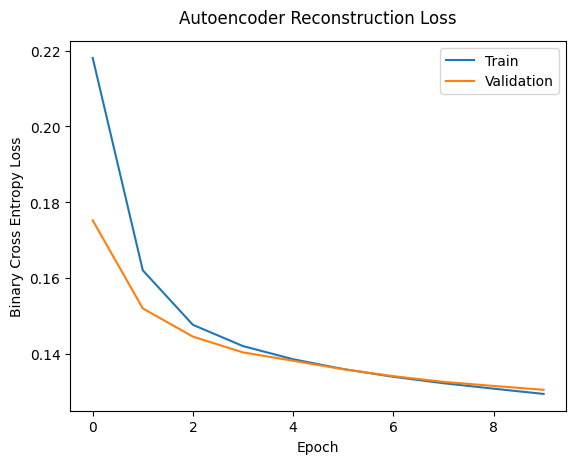

In [7]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


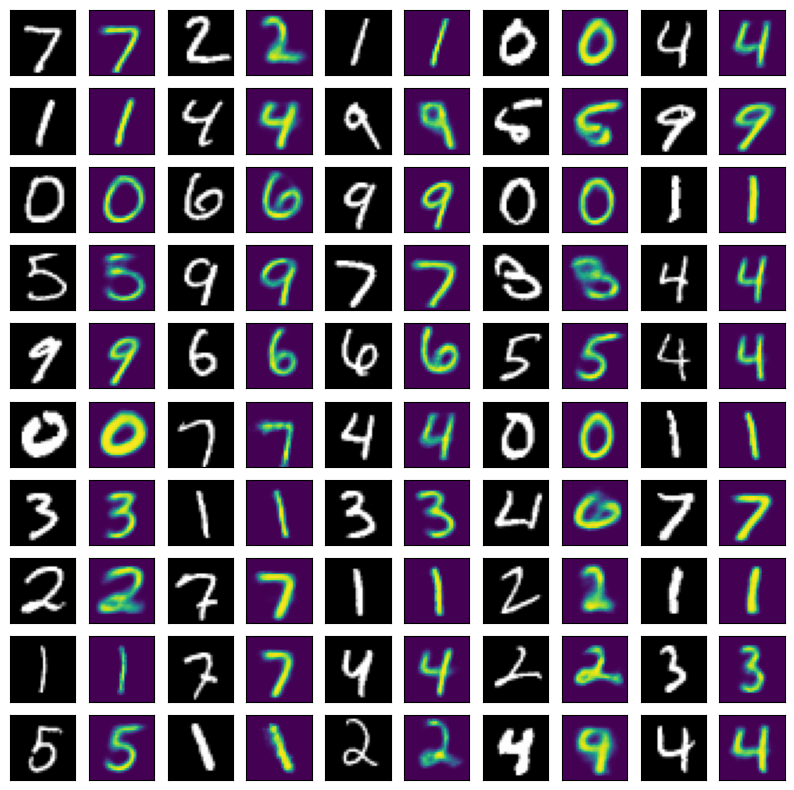

In [8]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [9]:
autoencoder.save('initially_trained_autoencoder.tf', save_format='tf')

But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 27ms/step
(1, 784)


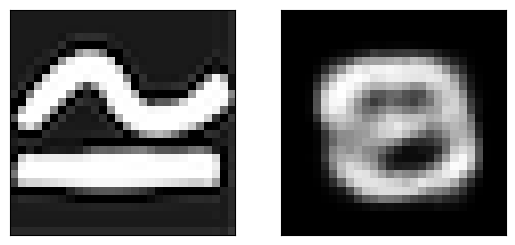

In [10]:
####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")

####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)

#####################################
# display the two images side by side
#
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


Above plot shows when bottle neck is 6. The model predicted something close to 3 from train data set. The autoencoder is forced to learn a more compressed, lower-dimensional representation of the input data. It results to loss of detail because it has fewer neurons to capture the complexity of the data. The model underfit, leading to poor reconstruction of the original image. So it reconstructed to some thing that is similar from train data set. 

![bottle neck 6 image](http://myweb.usf.edu/~lokeshanjaneya/img/bottleneck16.png)

Above plot shows when bottle neck is 16

![bottle neck 6 image](http://myweb.usf.edu/~lokeshanjaneya/img/bottleneck100.png)

Above plot shows when bottle neck is 100. The model tried to predict som thing that look similar to test image. The autoencoder has more capacity to learn the data representation. It has more neurons to capture detailed and complex features of the data. I can see a lot of improvement in the reconstruction of the original image. However, this can be considered as overfitting. which resulted a very similar image to test image.

### Summary

Since the new image wasn't part of the original training dataset, it's seen as an 'anomoly' by the autoencoder. This is indicated by the difference (error) betweem the original image and the reconstructed image.